# Anamoly Detection to Diagnose Breast Cancer Using Quasi-supervised Learning

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>
The demand of automatic classification of biomedical data has been dramatically increased in recent years to decrease dependicies on special trained persons and their experience. Since instant physical and psychological conditions of experts and their different experiences may cause misdiagnosis, decision support systems have been gaining popularity to minimize such situations. However, the general problem of biomedical data analysis is class-imblance. Expert-curated data with specific labels may require time consuming, and costly processes, while some labels can be easily obtainable. For example, labelling cell samples that are collected from breast tissue by Fine-needle aspiration cytology (FNAC) needs well trained and experienced physicians. On the otherhand, one can simply assign labels to healthy tissues. Apart from this, healty tissues are dominated the distribution of population. The requirements in such a task is therefore a learning algorithm that is developed for anomaly detection. It must automatically label the samples that differ from the general population beyond a certain statistical significance. To address this problem, I will use Quasi-Supervised Learning Algorithm (Karaçalı, 2010) that was proposed to handle the main problem of biomedical data analysis.  
  
In quasi-supervised learning strategy, we assume that there are two different dataset. One consist of the samples with a known label corresponding a specific class, and other one includes the data without labelling. The learning algorithm calculates posterior probabilities of each samples of belonging to each dataset by using the asymptotic properties of a nearest neighbor classification rule. Thereby, we can estimate overlap between two datasets, then we can detect the outliers among the unlabeled data.  
*Karaçalı, B., 2010. Quasi-supervised learning for biomedical data analysis. Pattern Recognition, 43(10), pp.3674-3682.*   

I will apply Quasi-Supervised Learning Algorithm over the Breast Cancer Wisconsin (Diagnostic) Dataset to show that it can be useful for automatically diagnosing breast cancer. 

## 2. Data <a name="data"></a>  
Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data   

There are distinctions between nucleus of healthy cell and nucleus of tumor cells. During development of cancer, the nucleus undergoes numerous alterations of size and
shape. These changes in nuclear size and shape indicates cell abnormality and disease. (evtić, 2014) The features of the samples in this dataset aims to refect these differentiations. Cell samples are collected from breast tissue by Fine-needle aspiration cytology (FNAC) to examine under a microscope. Then the many digital images were obtained from these samples by using scientific digital cameras. The computer vision diagnostic system extracts ten different features from these digitized images. (Street and Wolberg, 1993) 

Number of instance: 569  
Class distribution: 357 benign, 212 malignant  
1.Column- ID number  
2.Column- Diagnosis (M = malignant, B = benign)  
3-32 Columns- Features.  
  
There are 30 features that represent structural information of a cell nucleus.  
1) Radius which is the mean of distances from center to points on the perimeter.  
2) Texture which is the standard deviation of gray-scale values.  
3) Perimeter which is the total distance between the snake points constitutes the nuclear perimeter.  
4) Area which is measured simply by counting the number of pixels on the interior of the snake and adding one-half of the pixels in the perimeter.  
5) Smoothness which is local variation in radius lengths  
6) Compactness which is measured by this formula: perimeter^2 / area – 1.0. This dimensionless number is minimized by a circular disk and increases with the irregularity of the boundary. Thus, We will have measured our boundary how similar to a circle.  
7) Concavity which is severity of concave portions of the contour.  
8) Concave points which is the number of concave portions of the contour  
9) Symmetry which indicates how much our boundary is similar to symmetry.  
10) Fractal dimension is an index for characterizing fractal patterns or sets by quantifying their complexity as a ratio of the change in detail to the change in scale.  
The mean, standard error, and "worst" or largest values of the descriptors that are mentioned above are used as a feature vector. Hence, we had 30 features. 

*W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.*   
*evtić, P., Edens, L., Vuković, L. and Levy, D. (2014). Sizing and shaping the nucleus: mechanisms and significance. Current Opinion in Cell Biology, 28, pp.16-27.*   
*W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.*

## 3. Methodology <a name="methodology"></a> 

Let's assume that we have 100 samples that are already known benign. These ground-truth samples construct reference dataset $C_0$. I propose an algorithm based on Quasi-Spuervised Learning for assigning labels to the 100 samples without any grount-truth labels in a mixed dataset $C_1$. Posterior probabilities of each samples pf belonging in each dataset is calculated by using the asymptotic properties of a nearest neighbor classification rule. Thereby, we can detect the samples that are specific to $C_1$. In other words, the outlier samples, which are beyond the statistical threshold in mixed dataset, are labelled as malignant. 
  
Let construct M reference sets, $R_1, R_2, ..., R_M$ with n numbers sample from each class. If we carry out multiple nearest neighbor classifications on a sample using these reference sets, posterior probability of a sample belonging to a $C_0$, and  $C_1$ will equal to the probaility of the sample assigning $C_0$, and $C_1$ by randomly selected reference set. The mathmematical foundation of this assumption can be found in papers of Karacali. (Karaçalı, 2010)
$$f_0=\frac{the\ number\ of\ asigning\ to\ C_0}{M}\$$  

$$f_1=\frac{the\ number\ of\ asigning\ to\ C_1}{M}\$$  

However, carrying out so many numbers of nearest neighbor classification is not feasible due to computationally expensive. An algorithm for analytical computation of those posterior probabilities is proposed by Karacali.  
The labels of samples in $C_0$ are assigned as 0. 0 means that they are manually labelled as benign by an expert. And, the samples in $C_1$ are taken 1. 1 means here unlabeled instead of positive in conventional supervised learnin. They might be 0 or 1 after the learning process.  

To calculate posterior probability, $f_1(x)$ of a sample of belonging to $C_1$, we first decompose this probability conditionally on whether or not the point $x_1$  -nearest neighbor- is in R. Let define $E_k$ as the joint event $x_1,x_2,…,x_k∉R$  

$$f_1(x)=Pr(x_1∈R)1(y_1=1)+Pr⁡(x_1∉R)Pr⁡(y=1|E_1)$$ 
Also, we decompose $Pr⁡(y=1|E_1)$ on whether or not the point $x_2$  -second nearest neighbor- is in R.
$$Pr⁡(y=1|E_1)=Pr(x_2∈R|E_1)1(y_2=1)+Pr⁡(x_2∉R|E_1)Pr⁡(y=1|E_2)$$ 
and so on,...  
In general:
$$Pr⁡(y=1│E_{k-1}) =  Pr⁡(x_k∈R|E_{k-1})1(y_k=1)+Pr⁡(x_k∉R|E_{k-1})Pr⁡(y=1│E_k)$$ 
We carry out this decomposition until to reach the point k* at which the probability of a reference set containing this point equals one due to obligation of which reference set include n point from each class. Let say we have $l$ number of sample:
$$k^*=max[k|\sum\limits_{k'= k}^{l}1(y_{(k')}=1)\geqslant n\ and\ \sum\limits_{k' = k}^{l}1(y_{(k')}=0)\geqslant n]$$  
$Pr⁡(x_{k^*}∈R|E_{k^*-1})=1$ and  $Pr⁡(x_{k^*}∉R|E_{k^*-1})=0$

The probabilites wheter or not a point $k$ belong the reference set on the condition the points before $k$ not belong to reference set $E_{k-1}$ can be calculated by following formulas:
$$
  \begin{equation}
    Pr⁡(x_{k}∈R│E_{k-1})=
    \begin{cases}
      \frac{n}{l_{0}^k}\, & \text{if}\ y=0 \\
      \frac{n}{l_{1}^k}\, & \text{if}\ y=1 \\
    \end{cases}
  \end{equation}$$
$$Pr⁡(x_k∉R|E_{k-1})=1-Pr⁡(x_{k}∈R│E_{k-1})$$
where $l_{0}^k$ and $l_{1}^k$ indicates number of samples that belongs to $C_0$ and $C_1$ beyond the k points in our data set. $x_k, x_{k+1}, ..., x_l$

Following Algorithm is proposed to calculate posterior probability of a samples belonging in $C_0$:
- Compute euclidian distance between query sample and all other samples 
$$d_i=d(x,x_i)$$
- Convert distances to similarities and sort them from large to small 
$$d_i \rightarrow s_i$$ 
$$sort(s_i)$$
- Identify $k^*$, and set $Pr⁡(y=1│E_{k^*-1})=1(y=1)$
- for $k=k^*-1,k^*-2,...,1$ compute: 
$$Pr⁡(y=1│E_{k}) =  Pr⁡(x_{k+1}∈R|E_{k})1(y_{k+1}=1)+Pr⁡(x_{k+1}∉R|E_{k})Pr⁡(y=1│E_{k+1})$$ 
- set
$$f_1(x)=Pr(x_1∈R)1(y_1=1)+Pr⁡(x_1∉R)Pr⁡(y=1|E_1)$$ 
$$f_0(x)=1-f_1(x)$$

The optimum n is selected by using following optimization in which we penalize large n to achieve generalization goal of learning tasks, and penalize large overlaps.
$$E(n)=4 ( \sum_{i} f_0(x_i)f_1(x_i))+2n $$

*Karaçalı, B., 2010. Quasi-supervised learning for biomedical data analysis. Pattern Recognition, 43(10), pp.3674-3682.*   

In [1]:
#Import fundamental Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb

In [2]:
#Retrieve dataset
from urllib.request import urlretrieve
nucleus = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
urlretrieve(nucleus)
dataset = pd.read_csv(nucleus, sep=',',header=None)
attributes = ["patient ID", "diagnosis", "radius(mean)", "texture(mean)", "perimeter(mean)", "area(mean)", "smoothness(mean)", "compactness(mean)", "concavity(mean)", "concave points(mean)", "symmetry(mean)", "fractal dimension(mean)", 
                                      "radius(standard error)", "texture(standard error)", "perimeter(standard error)", "area(standard error)", "smoothness(standard error)", "compactness(standard error)", "concavity(standard error)", "concave points(standard error)", "symmetry(standard error)", "fractal dimension(standard error)",
                                      "radius(worst)", "texture(worst)", "perimeter(worst)", "area(worst)", "smoothness(worst)", "compactness(worst)", "concavity(worst)", "concave points(worst)", "symmetry(worst)", "fractal dimension(worst)"]
dataset.columns = attributes

In [3]:
dataset

,patient ID,diagnosis,radius(mean),texture(mean),perimeter(mean),area(mean),smoothness(mean),compactness(mean),concavity(mean),concave points(mean),...,radius(worst),texture(worst),perimeter(worst),area(worst),smoothness(worst),compactness(worst),concavity(worst),concave points(worst),symmetry(worst),fractal dimension(worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
malignant_data=dataset[dataset["diagnosis"]=="M"]
malignant_data

,patient ID,diagnosis,radius(mean),texture(mean),perimeter(mean),area(mean),smoothness(mean),compactness(mean),concavity(mean),concave points(mean),...,radius(worst),texture(worst),perimeter(worst),area(worst),smoothness(worst),compactness(worst),concavity(worst),concave points(worst),symmetry(worst),fractal dimension(worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [5]:
benign_data=dataset[dataset["diagnosis"]=="B"]
benign_data

,patient ID,diagnosis,radius(mean),texture(mean),perimeter(mean),area(mean),smoothness(mean),compactness(mean),concavity(mean),concave points(mean),...,radius(worst),texture(worst),perimeter(worst),area(worst),smoothness(worst),compactness(worst),concavity(worst),concave points(worst),symmetry(worst),fractal dimension(worst)
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


### Dataset for Quasi-Supervised Learning
I construct two dataset:  
Reference set $C_0$ that consist of the benign samples with label 0.   
Mixed set $C_1$ that consist of the unlabelled samples with label 1.  
The ratio between malignant and benign samples will be controlled by lambda parameter.     
Let $p_r(x)$ and $p_t(x)$ denote reference control and the target distributions, respectively in following formula which corresponds probability distribtution in mixed set C1. 
$$p_1(x)=(1-\lambda)p_r(x)+\lambda p_t(x)$$
$\lambda =1$ Conventional supervised problem. For small $\lambda$, our classification problem turns out anamoly detection problem to which we adress in QSL strategy.

**Select randomly 100 benign samples, and put them into C0** 

In [54]:
C0=benign_data.sample(n=100)

**Select randomly 100(1-$\lambda$) benign and 100$\lambda$ malignant samples(targets), and put them into C1**

In [55]:
lambd=0.25
C1_malignant=malignant_data.sample(n=int(100*lambd))

#subtract selected benign samples
benign_data2=benign_data[~benign_data.isin(C0)]
benign_data2=benign_data2.dropna()

C1_benign=benign_data2.sample(n=int(100*(1-lambd)))
C1 = pd.concat([C1_malignant, C1_benign])

In [56]:
C1["diagnosis"].value_counts()

B    75
M    25
Name: diagnosis, dtype: int64

**Construct a vector which consist of acutal labels of samples in C1. It will be used in evaluation** 

In [57]:
Y_actual=np.zeros((len(C1),1))
Y_actual[0:len(C1_malignant),0]=1

In [58]:
#extract features
X0 = C0.iloc[:, 2:32].values
X1 = C1.iloc[:, 2:32].values

#assign labels C0=0, C1=1
Y0=np.zeros((X0.shape[0],1))
Y1 = np.ones((X1.shape[0],1))

#merge them into one dataset for QSL
X=np.concatenate((X0,X1))
Y=np.concatenate((Y0,Y1))

print(X.shape)
print(Y.shape)

(200, 30)
(200, 1)


#### Pre-processing
I carry out normalization over the features by following formula:
$z = (x - u) / s $
where u is the mean of the feature, and s is the standard deviation of the feature.

In [59]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [60]:
X0=X[:100,:] #Reference Set
X1=X[100:,:] #Mixed Set

#Gound Truth labels for evaluation
ground_truth_melamona=C1[C1["diagnosis"]=="M"]
ground_truth_melamona_X=ground_truth_melamona.iloc[:, 2:32].values
ground_truth_melamona_X = sc.transform(ground_truth_melamona_X)

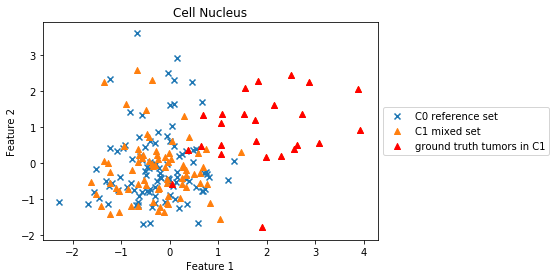

In [61]:
plt.scatter(X0[:, 0], X0[:, 1],marker='x', label='C0 reference set')
plt.scatter(X1[:, 0], X1[:, 1], marker='^',label='C1 mixed set')
plt.scatter(X1[:len(ground_truth_melamona_X), 0], X1[:len(ground_truth_melamona_X), 1],marker='^',color='r',label='ground truth tumors in C1')

plt.title('Cell Nucleus')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

We try to detect melanomas in C1 that are illustrated by red triangles above.

### Calculate similarity matrix between feature vectors using Euclidean Distance

In [62]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix=euclidean_distances(X, X)

#turn distance into similarity
similarity_matrix=np.zeros((distance_matrix.shape))
for i in range(0,similarity_matrix.shape[0]):
    for j in range(0,similarity_matrix.shape[1]):
        similarity_matrix[i,j]=1/(1+distance_matrix[i,j])

sm_df = pd.DataFrame(data=similarity_matrix)
sm_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.147324,0.130762,0.135617,0.170549,0.131280,0.085784,0.178733,0.146608,0.238333,...,0.246376,0.110971,0.099312,0.221216,0.155016,0.185074,0.293437,0.218535,0.123898,0.144799
1,0.147324,1.000000,0.128630,0.145359,0.145502,0.121746,0.124605,0.178497,0.236404,0.173289,...,0.198693,0.186205,0.164075,0.175745,0.162727,0.138506,0.174031,0.173981,0.182866,0.166298
2,0.130762,0.128630,1.000000,0.158029,0.190387,0.180395,0.104934,0.113533,0.147208,0.124404,...,0.128277,0.098993,0.113105,0.150783,0.136999,0.120138,0.138101,0.109753,0.161025,0.113628
3,0.135617,0.145359,0.158029,1.000000,0.235641,0.148616,0.089526,0.137182,0.209035,0.152482,...,0.148136,0.098604,0.132806,0.188562,0.208589,0.168677,0.148348,0.145077,0.160461,0.179194
4,0.170549,0.145502,0.190387,0.235641,1.000000,0.166025,0.090615,0.151215,0.204974,0.165506,...,0.170659,0.099925,0.122898,0.262900,0.180511,0.180414,0.178820,0.158274,0.156586,0.174447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.185074,0.138506,0.120138,0.168677,0.180414,0.113025,0.081761,0.183688,0.160900,0.221418,...,0.211998,0.103523,0.103747,0.185354,0.191736,1.000000,0.185886,0.219845,0.131246,0.231470
196,0.293437,0.174031,0.138101,0.148348,0.178820,0.143549,0.092829,0.172237,0.167749,0.240400,...,0.278449,0.116002,0.119300,0.214390,0.201675,0.185886,1.000000,0.217812,0.154897,0.159684
197,0.218535,0.173981,0.109753,0.145077,0.158274,0.112715,0.086928,0.258306,0.180145,0.248243,...,0.283506,0.121075,0.113030,0.212560,0.171390,0.219845,0.217812,1.000000,0.128503,0.222779
198,0.123898,0.182866,0.161025,0.160461,0.156586,0.139881,0.125353,0.123618,0.186614,0.136492,...,0.147352,0.115493,0.195809,0.145464,0.176765,0.131246,0.154897,0.128503,1.000000,0.148014


### Quasi-Supervised Learning

#### Distance Calculate
The function returns sorting distance between input pair and all other pairs with their labels 

In [63]:
def distance_calculate(similarity_matrix,query_instance,label_data):
    '''
    Inputs:
    similarity_matrix --> Similarity values between instances
                          It must be in dataframe format. 
                          Its indices and columns name must be same
    label_data        --> It's also dataframe where the last column consist of label of instances
                          The index name, or numbers in label_data must be same with the similarity_matrix 
    query_instance    --> Name of the instance(they should be same column names of the similarity_matrix)
    ----------------------------------------------------------------------------------------------
    Output:
    xi                --> Dataframe where first column contains similarity values between query instance and all instance in dataset, 
                                          second column contains labels of the instances whose names are located at index
    '''
    #find which column in similarity matrix correspond  query_instance
    instances=similarity_matrix.index.values 
    j=np.where(instances==query_instance)[0][0]
    
    #extract the column that belong to query instance from similarity matrix and sort them
    #Note: index names are also extracted
    xi=similarity_matrix.iloc[:,[j]].sort_values(by=similarity_matrix.columns[j],ascending=False)
    
    #initialize labels 
    labels=[]
    #append labels of instances from label_data
    #Note: index name of xi(hence similarity_matrix) is same within label_data
    for i in range(0,len(xi)):
        labels.append(int(label_data.at[xi.index[i],"label"]))
    #append it as a new column into xi
    xi['labels']=labels

    return xi

#### Posterior Probability Calculations
The function to return posterior probabilty of a query sample of belonging to C1 set.

In [64]:
def posterior_calculate(di,n):
    '''
    Inputs:
    di --> the binary numpy array consist of labels of all instance 
           0. index = label of querry instance
           Other labels are sorted by similarity between the instances to which they belong and query instance
    n  --> how many isntances are used from C0 and C1 seperately to construct reference sets
    ----------------------------------------------------------------------------------------------
    Output:
    f1 --> posterior probabilty of a query sample of belonging to C1 set.
    '''
    #identify k*    
    index_ones=np.where(di == 1)   #indices of samples with label 1
    index_zeros=np.where(di == 0)  #indices of samples with label *
    k_max_1=index_ones[0][-n]   #last index-(n-1)
    k_max_0=index_zeros[0][-n]
    k_prime=min(k_max_0,k_max_1)
    
    Pr_y_Ek=di[k_prime] #P(y|k_prime-1)=1(y)
    for k in range(k_prime-1,0,-1):
        if(di[k]==1): #the total number of samples with label 1 beyond this point
            curent_samples=di[k:] 
            l_n=len(np.where(curent_samples== 1)[0])
        if(di[k]==0): #the total number of samples with label 0 beyond this point
            curent_samples=di[k:] 
            l_n=len(np.where(curent_samples== 0)[0])
        
        Pr_y_Ek=np.add(np.multiply(np.divide(n,l_n),di[k]),np.multiply(1-np.divide(n,l_n),Pr_y_Ek))

    return Pr_y_Ek

In [65]:
di=np.array([0,0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0])
di=np.reshape(di, (41,1))
di.shape

(41, 1)

**Control Test**

In [66]:
for n in range(1,8):
    f1=posterior_calculate(di,n)
    f0=1-f1
    print("n: ",n,"f1 ",f1) 

n:  1 f1  [0.52631579]
n:  2 f1  [0.46900585]
n:  3 f1  [0.42921235]
n:  4 f1  [0.3945901]
n:  5 f1  [0.36168146]
n:  6 f1  [0.33037018]
n:  7 f1  [0.30032902]


#### Expected Output
n:  1 f1  [0.52631579]  
n:  2 f1  [0.46900585]  
n:  3 f1  [0.42921235]  
n:  4 f1  [0.3945901]  
n:  5 f1  [0.36168146]  
n:  6 f1  [0.33037018]  
n:  7 f1  [0.30032902]  


In [67]:
def QSL_model(similarity_matrix,label_data,nmax):
    '''
    it's takes three inputs:
    similarity_matrix --> Similarity values between instances
                          It must be in dataframe format. 
                          Its indices and columns name must be same
    label_data        --> It's also dataframe where the last column consist of label of instances
                          The index name, or numbers in label_data must be same with the similarity_matrix 
    nmax              --> maximum number of sample are taken each class to construct reference sets
    --------------------------------------------------------------------------
    Returns dictionary output that contains following elements:
    n_list: evaluated list of n (1,2,...,nmax)
    cost: calculated cost of which we use each n in n_list
    f0: posterior probabilities of which each samples belong to C0 when we use the n with minimum cost
    f1: posterior probabilities of which each samples belong to C1 when we use the n with minimum cost
    '''
    
    #number of instance
    m=len(label_data)
    
    #excract instances names from label dataframe
    instances=label_data.index.values
    
    #initialize posterior probabilites
    f0=np.zeros((1,m))    
    f1=np.zeros((1,m))    

    #list of the n that we will use to calculate posterior probabilities
    n_list=np.arange(1,nmax+1,1)
    #initialize cost array that in which each cost for each n will keep
    cost=np.zeros((1,len(n_list)))
    for n in n_list:
        
        for i in range(0,m):
            xi=distance_calculate(similarity_matrix,instances[i],label_data) #similarity between i. insantance and all other instances
            di=xi.iloc[:,-1].values #last column to numpy array
            f1[0][i]=posterior_calculate(di,n) #posterior probability of which i. instance belong C0
        f0=1-f1
        
        cost[0][n-1]=np.dot(4,np.dot(f0,f1.T))+np.dot(2,n)
        #(4*np.sum(np.multiply(f0,f1)))+(2*n)
    
    n_list=np.reshape(n_list, (1,nmax)) #(6,) -> (1,6)
    
    #Find optimum n
    n_optimum=n_list[0,np.argmin(cost)]
    
    #by using optimum, calculate optimum posterior probabilities
    f0_optimum=np.zeros((1,m))    
    f1_optimum=np.zeros((1,m))   
    for i in range(0,m):
        xi=distance_calculate(similarity_matrix,instances[i],label_data) #similarity between i. insantance and all other instances
        di=xi.iloc[:,-1].values
        f1_optimum[0][i]=posterior_calculate(di,n_optimum) #posterior probabilit of which i. instance belong C0
    f0_optimum=1-f1_optimum
    
    results = {"n_list": n_list,
             "cost": cost,
            "n_optimum":n_optimum,
             "f0": f0_optimum,
             "f1": f1_optimum}
    return results 

In [68]:
labels_df= pd.DataFrame(data=Y,columns=["label"])
labels_df

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
195,1.0
196,1.0
197,1.0
198,1.0


In [69]:
results =QSL_model(sm_df,labels_df,15)

In [70]:
cost=results['cost']
n_list=results['n_list']
f0=results['f0']
f1=results['f1']
results['n_optimum']

1

Text(0.5, 1.0, 'Cost Function')

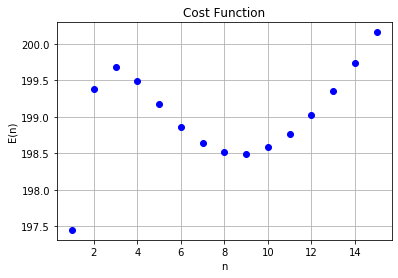

In [71]:
plt.plot(n_list,cost,'-bo')
plt.grid()
plt.xlabel('n')
plt.ylabel('E(n)')
plt.title('Cost Function')

**Write posterior probabilities and labels in same table**

In [72]:
posteriordist_df=labels_df.copy()
posteriordist_df["f1"]=f1.T
posteriordist_df

,label,f1
0,0.0,0.435051
1,0.0,0.425253
2,0.0,0.402929
3,0.0,0.420808
4,0.0,0.422323
...,...,...
195,1.0,0.435051
196,1.0,0.419596
197,1.0,0.430909
198,1.0,0.388586


## 4. Analysis <a name="analysis"></a>


**Let's plot posterior probability distribution of belonging to C1 for the samples in C1 and C0 separately**

(0, 1)

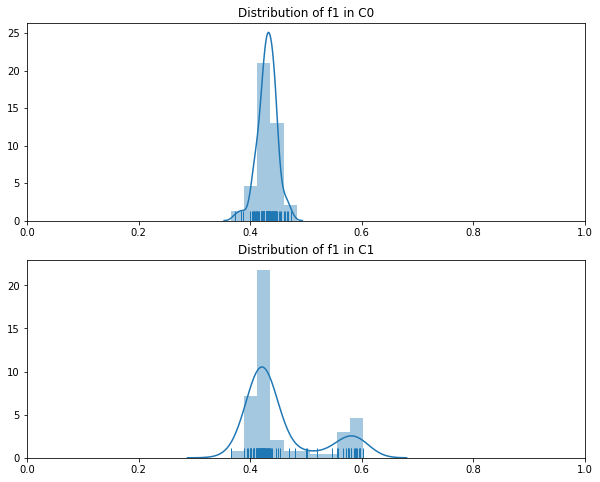

In [73]:
import seaborn as sns
fig, axs = plt.subplots(2, 1)
fig.set_figheight(8)
fig.set_figwidth(10)

count, bin_edges = np.histogram(posteriordist_df.iloc[:,1])

sns.distplot(posteriordist_df.iloc[:len(X0),1],axlabel=False,rug=True ,bins=bin_edges, ax=axs[0])
axs[0].title.set_text('Distribution of f1 in C0')
axs[0].set_xlim(0, 1)

sns.distplot(posteriordist_df.iloc[len(X0):,1],axlabel=False,rug=True,bins=bin_edges  , ax=axs[1])
axs[1].title.set_text('Distribution of f1 in C1')
axs[1].set_xlim(0, 1)

The algorithm managed to separate distributions of two dataset. We can easily see that the some samples in mixed dataset $C_1$ have greater posterior probability f1 abnormally. They are anamolies among the unlabelled samples that we try to detect. Also, overlap between two dataset $C_1$ and $C_0$, which corresponds benign samples, is obviously noticable.

### Kolmogorov–Smirnov test 
We have to now determine a threshold value for automatic labelling the outlier samples that are beyond the this threshold. I will use **Kolmogorov's D statistic** (also called the Kolmogorov-Smirnov statistic) to choose optimum threshold. It actually enables you to decide whether distributions of the two samples sets comes from same distribution or not. By comparing the two cumulative distributions, it returns the maximum difference between them to calculate a confidence interval at which two distributions differ each other. Dmax is the posterior probability where the maximum difference between the two cumulative distributions occurs. The samples in $C_1$, which are beyond the this value, will be labelled as melanoma.

In [74]:
def Kolmogorov_Dmax(posteriordist_df,C0,C1):
    
    #copy the samples and their posterior distributions into new dataframe
    Kolmogorov_df=posteriordist_df.copy()
    
    #add new columns that wil be used to calculate CDF and Dmax into this dataframe
    zero_column=np.zeros((len(Kolmogorov_df),1))
    Kolmogorov_df["F1_C0"]=zero_column # the column of CDF for C0
    Kolmogorov_df["F1_C1"]=zero_column # the column of CDF for C1
    Kolmogorov_df["Dmax"]=zero_column # the column of difference between two CDF
    
    #sort the posterior distributions the samples in C1 and C0 together
    sorted_df=Kolmogorov_df.sort_values(by=['f1'])
    
    #give equal probability of occuring to each samples in two dataset
    p0=1/len(C0)
    p1=1/len(C1)
    
    #inport to numpy matrix for calculations
    KSD_table=sorted_df.values
        
    Dmax=0
    T=0
    
    #first sample
    if KSD_table[0][0]==0:
        KSD_table[0][2]=KSD_table[0][2]+p0
    else:
        KSD_table[0][3]=KSD_table[0][3]+p1
    KSD_table[0][4]=abs(KSD_table[0][3]-KSD_table[0][2])
    
    #CDF calculation
    for i in range(1,len(KSD_table)):
        if KSD_table[i][0]==0: #curent sample in C0
            KSD_table[i][2]=KSD_table[i-1][2]+p0
            KSD_table[i][3]=KSD_table[i-1][3]
        else:                  #curent sample in C1
            KSD_table[i][3]=KSD_table[i-1][3]+p1
            KSD_table[i][2]=KSD_table[i-1][2]
        KSD_table[i][4]=abs(KSD_table[i][3]-KSD_table[i][2])
        
        if KSD_table[i][4]>=Dmax:      #Comparing Dmax 
            Dmax=KSD_table[i][4]       #If bigger change 
            F1_C0_T=KSD_table[i][2]    #Save CDF of C0
            F1_C1_T=KSD_table[i][3]    #Save CDF of C1
            T=KSD_table[i][1]          #Save current posterior as threshold

    CDF_C0=KSD_table[:,2]
    CDF_C1=KSD_table[:,3]
    posterior_samples=KSD_table[:,1]
            
    ks_results = {"Dmax": Dmax,
             "T": T,
            "CDF_C0":CDF_C0,
            "CDF_C1": CDF_C1,
             "posterior_samples":posterior_samples,
             "F1_C0_T":F1_C0_T,
              "F1_C1_T":F1_C1_T}
    
    return ks_results 

In [75]:
posteriordist_df

,label,f1
0,0.0,0.435051
1,0.0,0.425253
2,0.0,0.402929
3,0.0,0.420808
4,0.0,0.422323
...,...,...
195,1.0,0.435051
196,1.0,0.419596
197,1.0,0.430909
198,1.0,0.388586


In [76]:
ks_results=Kolmogorov_Dmax(posteriordist_df,X0,X1)

In [77]:
Dmax=ks_results['Dmax']
T=ks_results['T']              #threshold posterior 
F1_C0=ks_results['CDF_C0']     #All CDF values 
F1_C1=ks_results['CDF_C1']
f1_all=ks_results['posterior_samples']

In [78]:
#CDF values at which Dmax occurd
F1_C0_T=ks_results['F1_C0_T'] 
F1_C1_T=ks_results['F1_C1_T']

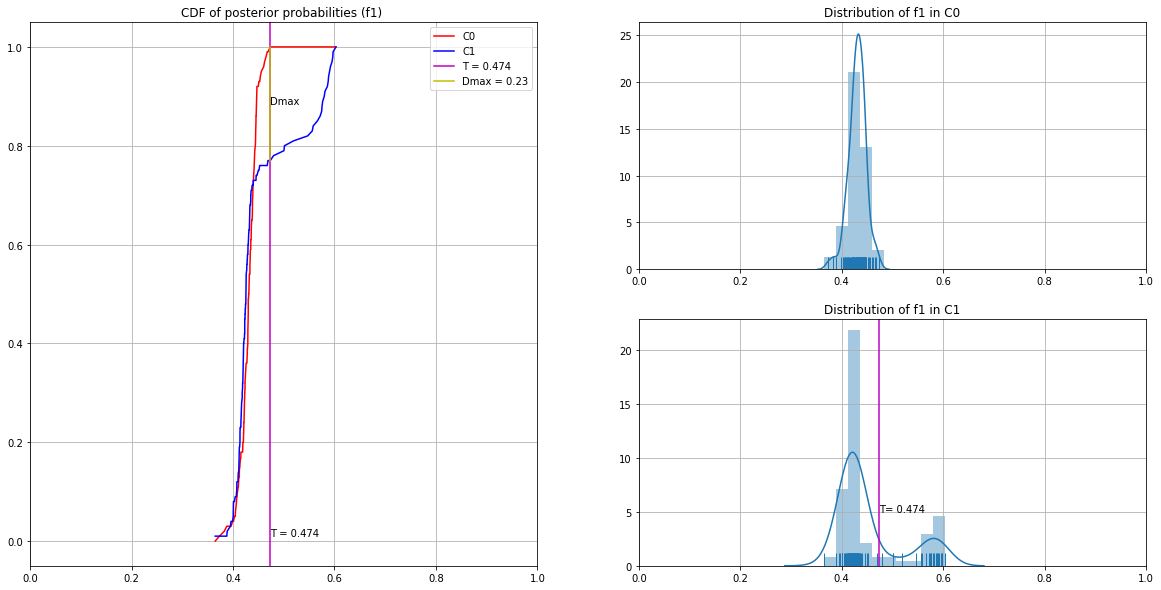

In [79]:
import seaborn as sns
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

count, bin_edges = np.histogram(posteriordist_df.iloc[:,1])

#create Dmax line
y_dmax = np.arange(F1_C1_T, F1_C0_T, 0.01)
x_dmax= np.full(y_dmax.shape, T)

sns.distplot(posteriordist_df.iloc[:len(X0),1],axlabel=False,rug=True ,bins=bin_edges, ax=axs[0,1])
axs[0,1].title.set_text('Distribution of f1 in C0')
axs[0,1].set_xlim(0, 1)
axs[0,1].grid(True)


sns.distplot(posteriordist_df.iloc[len(X0):,1],axlabel=False,rug=True,bins=bin_edges  , ax=axs[1,1])
axs[1,1].title.set_text('Distribution of f1 in C1')
axs[1,1].set_xlim(0, 1)
axs[1,1].grid(True) 
axs[1,1].axvline(x=T, ymin=0, ymax=1,label='T',c='m')
axs[1,1].annotate("T= "+str(round(T, 3)),xy=(T,5))


gs = axs[0, 0].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])

axbig.plot(f1_all,F1_C0, 'r',label='C0') 
axbig.plot(f1_all,F1_C1, 'b',label='C1') 
axbig.axvline(x=T, ymin=0, ymax=1,label='T = '+str(round(T, 3)),c='m')
axbig.plot(x_dmax, y_dmax,'y',label='Dmax = '+str(round(Dmax,3)))
axbig.annotate("T = "+str(round(T, 3)),xy=(T,0.01))
axbig.annotate("Dmax",xy=(T,(F1_C1_T+F1_C0_T)/2))

axbig.title.set_text('CDF of posterior probabilities (f1) ')
axbig.legend()
axbig.set_xlim([0, 1]) 


axbig.grid(True) 

plt.show()

**The samples in C1 that are beyond T are labelled as positive. It means that they are not same with the reference set**

In [80]:
posteriordist_df[(posteriordist_df["f1"]>T) & (posteriordist_df["label"]==1)]

,label,f1
100,1.0,0.571818
101,1.0,0.519697
102,1.0,0.595253
103,1.0,0.587677
104,1.0,0.603131
105,1.0,0.581313
106,1.0,0.588485
108,1.0,0.556263
109,1.0,0.592121
110,1.0,0.576869


## 5. Results and Discussion <a name="results"></a>

In [81]:
outlier_index=posteriordist_df[(posteriordist_df["f1"]>T) & (posteriordist_df["label"]==1)].index

In [82]:
outlier_index

Int64Index([100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
            114, 115, 116, 117, 118, 119, 120, 122, 123, 124],
           dtype='int64')

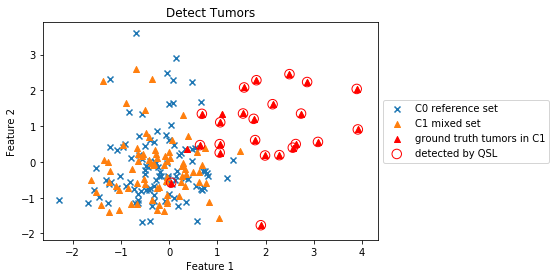

In [83]:
plt.scatter(X0[:, 0], X0[:, 1],marker='x', label='C0 reference set')
plt.scatter(X1[:, 0], X1[:, 1], marker='^',label='C1 mixed set')
plt.scatter(ground_truth_melamona_X[:, 0], ground_truth_melamona_X[:, 1],marker='^',color='r',label='ground truth tumors in C1')
plt.scatter(X[outlier_index, 0], X[outlier_index, 1],s=90,facecolors='none', edgecolors='r',label='detected by QSL')
plt.title('Detect Tumors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**The melemona samples without any label in mixed set C1 can be successfully detected by Quasi-Supervised Learning algorithm as shown above.**

In [84]:
Y_predicted=np.zeros(Y_actual.shape)
Y_predicted[outlier_index-len(C0),0]=1

In [85]:
def evaluate_results(Y_predicted,Y_actual):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_actual, Y_predicted)
    cm_df = pd.DataFrame(data=cm,index=["Actual Negatives", "Actual Positives"], columns=["Predicted Negatives", "Predicted Positives"])
    accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
    recall=cm[1,1]/(cm[1,0]+cm[1,1]) #sensitivity
    precision=cm[1,1]/(cm[0,1]+cm[1,1])
    specifity=cm[0,0]/(cm[0,0]+cm[0,1])
    
    evaluation_results = {"confusion_matrix": cm_df,
                                  "accuracy": accuracy,
                                  "recall":recall,
                                  "precision": precision,
                                  "specifity":specifity}
    
    return evaluation_results
    

In [86]:
def print_results(evaluation_results):
    print(evaluation_results['confusion_matrix'])
    print("")
    print("Accuracy=",evaluation_results['accuracy'])
    print("Recall/Sensitivy=",evaluation_results['recall'])
    print("Precision=",evaluation_results['precision'])
    print("Specifity=",evaluation_results['specifity'])

In [87]:
evaluation_results=evaluate_results(Y_predicted,Y_actual)
print_results(evaluation_results)

                  Predicted Negatives  Predicted Positives
Actual Negatives                   75                    0
Actual Positives                    2                   23

Accuracy= 0.98
Recall/Sensitivy= 0.92
Precision= 1.0
Specifity= 1.0


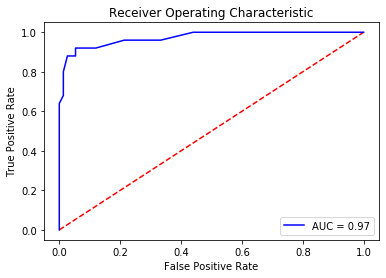

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc


score = posteriordist_df[posteriordist_df["label"]==1]['f1'].values

# false positive rate
fpr = []
# true positive rate
tpr = []
# Iterate thresholds from 0.0, 0.01, ... 1.0
thresholds = np.arange(0.0, 1.01, .01)

# get number of positive and negative examples in the dataset
P = sum(Y_actual)
N = len(Y_actual) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(score)):
        if (score[i] > thresh):
            if Y_actual[i] == 1:
                TP = TP + 1
            if Y_actual[i] == 0:
                FP = FP + 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))


roc_auc = auc(fpr, tpr)
    

plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**The results show that learning algorithm did a good job for the data at hand.**

**Let's put it all together and carry out same procedure over the 10 randomly generated data to calculate mean and standard deviation of accuracy metrics.**

In [89]:
accuracy=[]
recall=[]
precision=[]
specifity=[]

for i in range(0,10):
   
    #construct C0 with benign samples
    C0=benign_data.sample(n=100) 
    
    #Construct C1 with both benign an melanoma samples
    lambd=0.25
    C1_malignant=malignant_data.sample(n=int(100*lambd))
    C1_benign=benign_data.sample(n=int(100*(1-lambd)))
    C1 = pd.concat([C1_malignant, C1_benign])
    
    #ground-truth labels in C1
    #it will be used in evaluation
    Y_actual=np.zeros((len(C1),1))
    Y_actual[0:len(C1_malignant),0]=1
    
    #extract features
    X0 = C0.iloc[:, 2:32].values
    X1 = C1.iloc[:, 2:32].values

    #assign labels C0=0, C1=1
    Y0=np.zeros((X0.shape[0],1))
    Y1 = np.ones((X1.shape[0],1))
    
    
    
    #merge them into one dataset for QSL
    X=np.concatenate((X0,X1))
    Y=np.concatenate((Y0,Y1))
    labels_df= pd.DataFrame(data=Y,columns=["label"])
    
    #normilize features
    X = sc.fit_transform(X)
    
    #Similarity Matrix Calculation
    distance_matrix=euclidean_distances(X, X)
    similarity_matrix=(np.amax(distance_matrix)-distance_matrix)/np.amax(distance_matrix)
    sm_df = pd.DataFrame(data=similarity_matrix)
    
    #Quasi-Supervised Algorithm
    results =QSL_model(sm_df,labels_df,15)
    
    #Posterior propabilites of each samples of beloning to C1
    f1=results['f1']
    posteriordist_df=labels_df.copy()
    posteriordist_df["f1"]=f1.T
    
    #Detect Threshold for labeling the outlier samples in C1 using Kolmogorov–Smirnov test
    ks_results=Kolmogorov_Dmax(posteriordist_df,X0,X1)
    T=ks_results['T'] #threshold posterior 
    
    #index of outlier samples in C1 
    outlier_index=posteriordist_df[(posteriordist_df["f1"]>T) & (posteriordist_df["label"]==1)].index
    
    #label outliers as melanoma
    Y_predicted=np.zeros(Y_actual.shape)
    Y_predicted[outlier_index-len(C0),0]=1
    
    evaluation_results=evaluate_results(Y_predicted,Y_actual)

    accuracy.append(evaluation_results['accuracy'])
    recall.append(evaluation_results['recall'])
    precision.append(evaluation_results['precision'])
    specifity.append(evaluation_results['specifity'])


In [90]:
for name in ['accuracy', 'recall', 'precision', 'specifity']:
    scores = np.c_[eval(name)]
    print("For %s: %0.2f (+/- %0.2f)" % (name, scores.mean(), scores.std()))

For accuracy: 0.89 (+/- 0.06)
For recall: 0.92 (+/- 0.06)
For precision: 0.75 (+/- 0.14)
For specifity: 0.88 (+/- 0.09)


Since the cost of false negative is much more than cost of false positive for patients, the most important metric in medical diagnosis applications is recall/sensitivity. It measures what fraction of positive samples can be predicted correctly by calculating the ratio of correctly predicted positives and ground-truth positives. The results show that the proposed learning algorithm is suitable for automatic classification of medical data, particularly breast cancer data. 

## 6. Conclusion <a name="conclusion"></a>


I proposed to show that Quasi-Supervised Learning Algorithm can be applied on the nucleus data that is extracted from breast tissue. Giving promising recall results and the ability to separate distribution of two different sets indicates success of our learning algorithm on this task. I should also note that recall is the most vital metric for medical diagnosis as mentioned before. The difference of QSL algorithm is that it requires ground-truth data that comes from only one class. This attribute makes it advantageous for breast cancer detection where the problem is closer to anomaly detection rather than supervised learning.